# "2019 September Portfolio BackTest"
> "2019 September portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [1]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [2]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [3]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [4]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [5]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190901].loc[df_testp.Date<20191001].sort_values(by='Date',ascending=True).copy().reset_index()

**Long-Short Portfolio**

In [6]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [7]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [8]:
#hide_input
df_testp

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,2605,MATRIX SERVICE CO,20190904,MTRX,-1.0,1.0,0.127495,0.364038,0.508467,0.961959,...,0.987493,0.951546,1.010943,1.007042,1.019365,1.000000,1.000000,1.000000,1.000000,0
1,2606,ORANCO INC,20190904,ORNC,1.0,1.0,0.211100,0.328446,0.460454,1.142857,...,1.142857,0.617284,1.851429,1.000000,1.000000,1.010943,0.961959,0.968734,0.987493,1
2,2607,MISONIX INC,20190905,MSON,-1.0,1.0,0.124316,0.432002,0.443682,0.893056,...,0.925494,0.936736,0.953371,0.993757,1.042833,1.871689,1.099382,1.107124,1.128564,2
3,2608,"CISCO SYSTEMS, INC.",20190905,CSCO,1.0,1.0,0.124340,0.334332,0.541328,1.003304,...,1.033251,0.994676,1.008674,1.012968,1.016663,1.784413,0.981810,0.982552,1.044479,3
4,2609,STRATTEC SECURITY CORP,20190905,STRT,1.0,1.0,0.159648,0.318559,0.521793,0.989062,...,1.055729,0.994241,0.994792,1.011585,1.055180,1.799891,0.985054,0.998583,1.079209,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2661,THOR INDUSTRIES INC,20190930,THO,-1.0,1.0,0.107718,0.352431,0.539851,0.968927,...,0.972105,0.970297,0.998588,0.998178,1.005111,1.162057,0.399677,0.301001,0.336102,65
66,2660,"Hypersolar, Inc.",20190930,HYSR,0.0,1.0,0.143713,0.350436,0.505852,1.333333,...,1.000000,1.000000,1.333333,1.000000,0.750000,1.160415,0.387258,0.291116,0.326727,66
67,2673,WATERSIDE CAPITAL CORP,20190930,WSCC,0.0,-1.0,0.103862,0.477586,0.418553,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.547220,0.516344,0.388155,0.326727,67
68,2665,VERITEC INC,20190930,VRTC,-1.0,1.0,0.113273,0.394016,0.492710,0.800000,...,0.800000,1.000000,0.800000,1.000000,1.000000,1.547220,0.516344,0.388155,0.326727,68


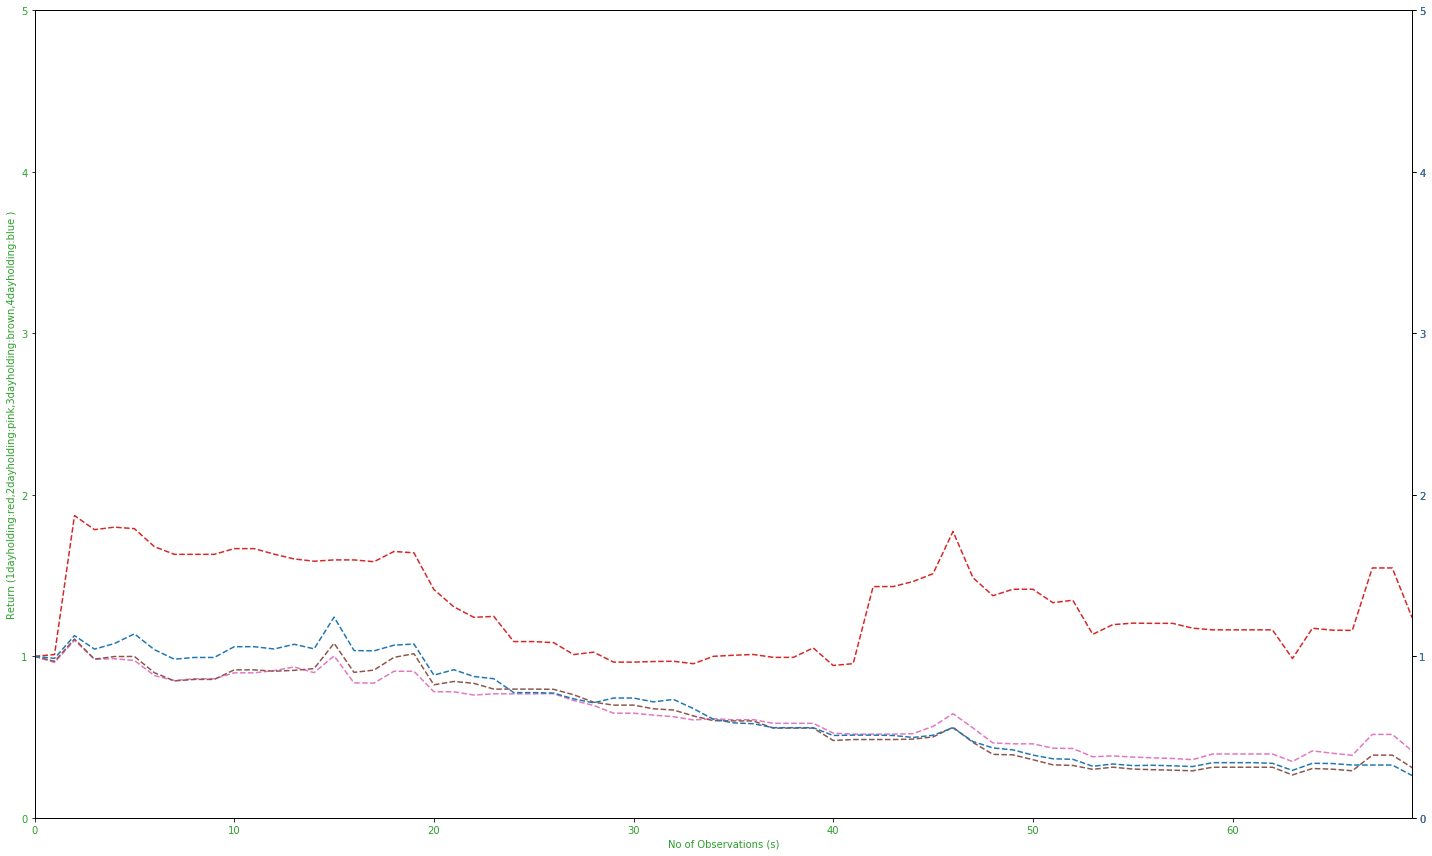

In [9]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [10]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='Date',ascending=True).reset_index()


In [11]:
#hide_input
df_long['indexx']=range(len(df_long))

In [12]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [13]:
#hide_input
df_long

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,0,2605,MATRIX SERVICE CO,20190904,MTRX,-1.0,1.0,0.127495,0.364038,0.508467,...,0.987493,0.951546,1.010943,1.007042,1.019365,1.000000,1.000000,1.000000,1.000000,0
1,1,2606,ORANCO INC,20190904,ORNC,1.0,1.0,0.211100,0.328446,0.460454,...,1.142857,0.617284,1.851429,1.000000,1.000000,1.010943,0.961959,0.968734,0.987493,1
2,2,2607,MISONIX INC,20190905,MSON,-1.0,1.0,0.124316,0.432002,0.443682,...,0.925494,0.936736,0.953371,0.993757,1.042833,1.871689,1.099382,1.107124,1.128564,2
3,3,2608,"CISCO SYSTEMS, INC.",20190905,CSCO,1.0,1.0,0.124340,0.334332,0.541328,...,1.033251,0.994676,1.008674,1.012968,1.016663,1.784413,0.981810,0.982552,1.044479,3
4,4,2609,STRATTEC SECURITY CORP,20190905,STRT,1.0,1.0,0.159648,0.318559,0.521793,...,1.055729,0.994241,0.994792,1.011585,1.055180,1.799891,0.985054,0.998583,1.079209,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,63,2663,CONCIERGE TECHNOLOGIES INC,20190930,CNCG,1.0,1.0,0.121736,0.348209,0.530055,...,1.150000,1.000000,1.190000,0.966387,1.000000,0.871595,0.291576,0.221358,0.230147,61
62,64,2662,COPART INC,20190930,CPRT,0.0,1.0,0.110246,0.317156,0.572598,...,0.995767,0.973595,0.990041,1.023118,1.009720,1.037198,0.346975,0.254562,0.264669,62
63,65,2661,THOR INDUSTRIES INC,20190930,THO,-1.0,1.0,0.107718,0.352431,0.539851,...,0.972105,0.970297,0.998588,0.998178,1.005111,1.026869,0.334449,0.251044,0.263549,63
64,66,2660,"Hypersolar, Inc.",20190930,HYSR,0.0,1.0,0.143713,0.350436,0.505852,...,1.000000,1.000000,1.333333,1.000000,0.750000,1.025418,0.324056,0.242800,0.256197,64


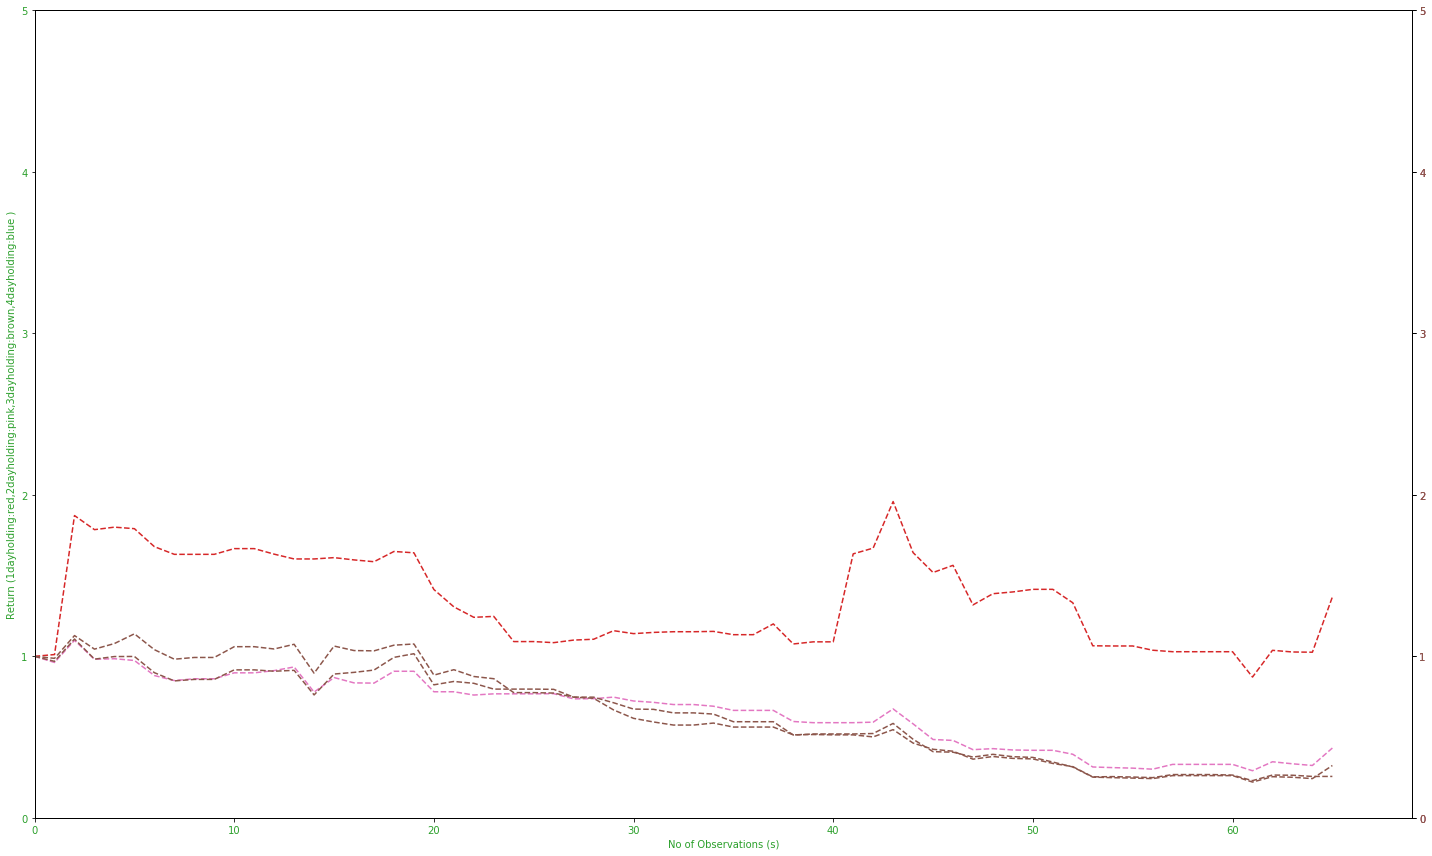

In [14]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5

a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_long['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()

**Short Portfolio**

In [15]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='Date',ascending=True).reset_index()

In [16]:
#hide_input
df_short['indexx']=range(len(df_short))

In [17]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [18]:
#hide_input
df_short

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,26,2631,PLURISTEM THERAPEUTICS INC,20190912,PSTI,1.0,-1.0,0.124098,0.452363,0.423539,...,0.953334,1.013636,0.932039,1.013825,0.995327,1.000000,1.000000,1.000000,1.000000,0
1,28,2633,PALATIN TECHNOLOGIES INC,20190912,PTN,-1.0,-1.0,0.141499,0.707169,0.151331,...,1.041530,0.990566,0.940000,1.046729,1.068627,0.932039,0.944748,0.957809,0.953334,1
2,44,2649,BION ENVIRONMENTAL TECHNOLOGIES INC,20190924,BNET,-1.0,-1.0,0.118534,0.463552,0.417915,...,1.027503,1.051724,1.033333,0.945455,1.000000,0.876117,0.879686,0.933522,0.992926,2
3,67,2673,WATERSIDE CAPITAL CORP,20190930,WSCC,0.0,-1.0,0.103862,0.477586,0.418553,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.905320,0.956026,0.959197,1.020234,3


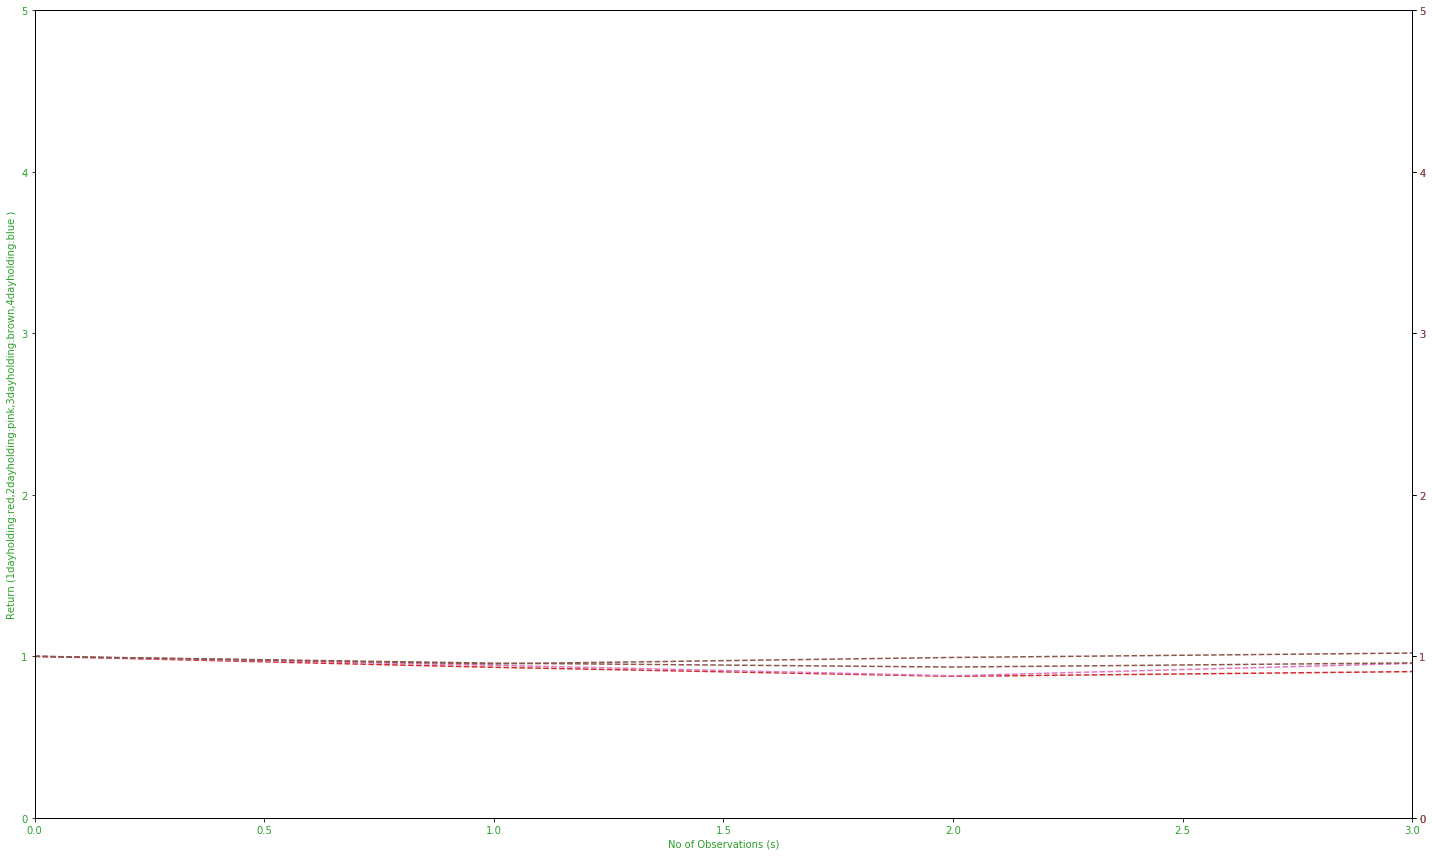

In [19]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_short['indexx'].min(),df_short['indexx'].max()
#x,y=0,10
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()